**this code snippet will allow you to upload data to google colab.**

This data will be available **only** in the notebook in which you run this code. Add this to the top of your notebook for Task2

In [1]:
# use this code snippet to upload the mat file to google colab 
# The dataset will be stored in the variables X and Y


import scipy.io as sio
import numpy as np

import os.path
if not os.path.isfile('training_data.mat'):
  from google.colab import files
  uploaded = files.upload()
  
  
  
data = sio.loadmat('training_data.mat')
X = np.array(data['X'])

X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
Y = np.array(data['Y'])

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape)

Training data shape: (15468, 3)
Labels shape: (15468, 1)


In [2]:
# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

In [5]:
class Perceptron:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w0 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w1 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w2 = np.random.randn(input_size,1).reshape(input_size,1)
        # we will store our accuracy after each iteration here
        self.history = []
        
    def train(self,X,Y, max_epochs = 100):
      
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0
        
        Y0=Y.copy() #case 1
        Y0[Y0==1]=2
        Y0[Y0==0]=1
        Y0[Y0==2]=0
        
        Y1=Y.copy()#case 2
        Y1[Y1==0]=2
        Y1[Y1==2]=0
        
        Y2=Y.copy()#case 3
        Y2[Y2==1]=0
        Y2[Y2==2]=1
        # Running the algorithm until all the data points are correctly classified
        while not converged and epochs < max_epochs :            
            converged=True            
            learning_rate=0.001
            for index in range(len(X)):                        
                #---------------------Case-1--------------#
                out=np.matmul(X[index],self.w0) #matrix row and weight multiplication
                if out>=0: # perception condition
                    out=1.0
                else:
                    out=0.0
                if out!=Y0[index]:
                    converged=False
                    self.w0=self.w0+(Y0[index]-out)*learning_rate*X[index].reshape(-1,1) # gradient descent weight update
                #---------------------Case-2--------------#
                out=np.matmul(X[index],self.w1) #matrix row and weight multiplication
                if out>=0: # perception condition
                    out=1.0
                else:
                    out=0.0
                if out!=Y1[index]:
                    converged=False
                    self.w1=self.w1+(Y1[index]-out)*learning_rate*X[index].reshape(-1,1) # gradient descent weight update
                #---------------------Case-3--------------#
                out=np.matmul(X[index],self.w2) #matrix row and weight multiplication
                if out>=0: # perception condition
                    out=1.0
                else:
                    out=0.0
                if out!=Y2[index]:
                    converged=False
                    self.w2=self.w2+(Y2[index]-out)*learning_rate*X[index].reshape(-1,1) # gradient descent weight update



            
            
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y)
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
        pl.close()
        pl.figure(figsize=[10,8]) #for visulizing some large image
        pl.xlim((0,1))#Get or set the x limits of the current axes
        pl.ylim((0,1))#Get or set the y limits of the current axes
        out1 = np.matmul(X,self.w0).squeeze()#case weight multiplication with data 
        out2 = np.matmul(X,self.w1).squeeze()
        out3 = np.matmul(X,self.w2).squeeze()

        P1 = X[out1 >= 0,:] #only consider if positive
        P2 = X[out2 >= 0,:]
        P3 = X[out3 >= 0,:] 
        pl.plot(P1[:,0],P1[:,1],'ro', label = 'Class 0')# only plot positive points
        pl.plot(P2[:,0],P2[:,1],'go', label = 'Class 1')#Negative discard as the overwrite
        pl.plot(P3[:,0],P3[:,1],'bo', label = 'Class 2')#other classes

        x1 = np.linspace(0.55,-0.48)# ground truth lines plotting
        x3=np.linspace(-1,1)# ground truth lines plotting
        x2=np.linspace(-0.55,0.48)# ground truth lines plotting
        pl.plot(x3, np.linspace(-0.00,-0.00), label = 'GT1')
        pl.plot(x2, np.linspace(-0.9,0.9), label = 'GT2')
        pl.plot(x1,np.linspace(-0.9,0.9), label = 'GT3')

        a1,b1,c1 = self.w0[0],self.w0[1],self.w0[2]#class 1 estimated line ploting
        pl.plot(x1, -a1/b1 * x1 - c1/b1, label = 'Estimated1')

        a2,b2,c2 = self.w1[0],self.w1[1],self.w1[2]#class 2 estimated line ploting
        pl.plot(x2, -a2/b2 * x2 - c2/b2, label = 'Estimated2')

        a3,b3,c3 = self.w2[0],self.w2[1],self.w2[2]#class 3 estimated line ploting
        pl.plot(x3, -a3/b3 * x3 - c3/b3, label = 'Estimated3')
        
        pl.axis('tight')
        pl.legend()        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out0 = np.matmul(X,self.w0)
        Y_bar0 = (out0 >= 0)
        
        out1 = np.matmul(X,self.w1)
        Y_bar1 = (out1 >= 0)
        
        out2 = np.matmul(X,self.w2)
        Y_bar2 = (out2 >= 0)
        
        Y_bar=Y_bar0+Y_bar1+Y_bar2
        
        accuracy = np.count_nonzero(Y_bar)/np.float(Y_bar.shape[0])
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
        pl.close()
        plt.figure(figsize=[10,8])
        plt.ylim((0,1.01))
        plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()


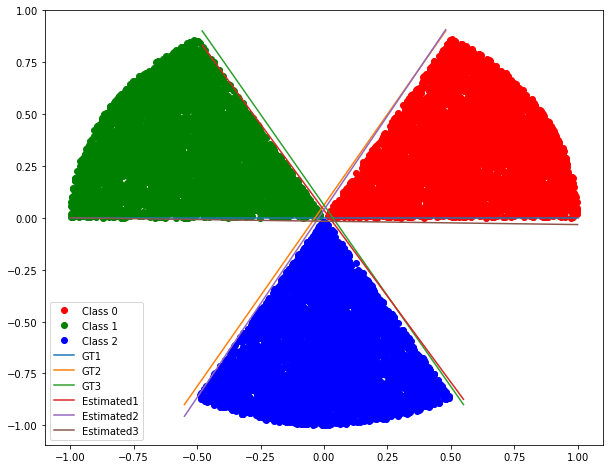

Qutting: Converged


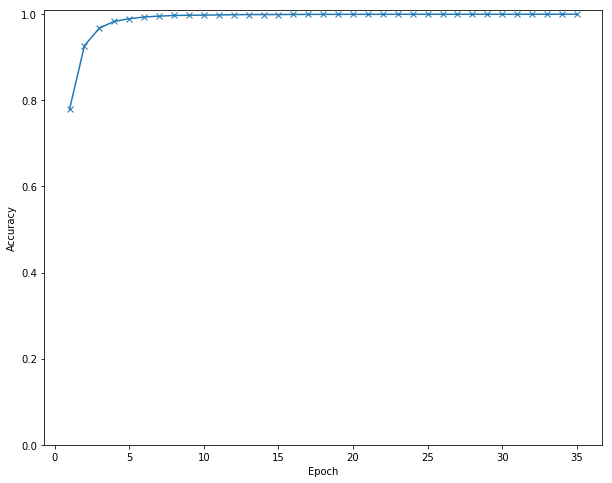

In [7]:
number_of_samples = 100
max_number_of_epochs = 100


p = Perceptron(3)
p.train(X,Y,max_number_of_epochs)